In [1]:
#reading subject list
import pandas as pd
import seaborn as sb

sub_list_file = '/codes/devel/subjects.list'
sub_list = pd.read_csv(sub_list_file, sep=',', header=0, index_col=0)

#reading freesurfer results
out_dir = '/output'
FS_DIR  = out_dir+'/freesurfer_output/'
GROUPS  = ['PD','ET','NC']

tst_path = FS_DIR+GROUPS[0]+'/aparc_area_lh.txt'
sf_lh    = pd.read_csv(tst_path, sep='\t', header=0, index_col=0)
tst_path1 = FS_DIR+GROUPS[0]+'/aparc_volume_lh.txt'
vol_lh    = pd.read_csv(tst_path1, sep='\t', header=0, index_col=0)
tst_path2 = FS_DIR+GROUPS[0]+'/aparc_volume_lh.txt'
vol_lh    = pd.read_csv(tst_path1, sep='\t', header=0, index_col=0)


Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [83]:
# template for 55-75, take first 19 of PD
res = sub_list.join(sf_lh, how='left')
res.join(vol_lh.iloc[:,0:-2], how='left')
sub_age57=sub_list[(sub_list['age']>=55) & (sub_list['age']<=75)]
import numpy as np
pd_57=list(sub_age57[sub_age57['diagnosis']=='PD'].index)[0:19]
et_57=list(sub_age57[sub_age57['diagnosis']=='ET'].index)
nc_57=list(sub_age57[sub_age57['diagnosis']=='NC'].index)
print('PD('+str(len(pd_57))+'): '+' '.join(pd_57))
print('ET('+str(len(et_57))+'): '+' '.join(et_57))
print('NC('+str(len(nc_57))+'): '+' '.join(nc_57))
sub_list57=pd_57+et_57+nc_57
sub57=sub_age57[sub_age57.index.isin(sub_list57)]
sub57.shape

PD(19): sub-0002 sub-0006 sub-0008 sub-0009 sub-0014 sub-0015 sub-0022 sub-0024 sub-0028 sub-0030 sub-0034 sub-0035 sub-0037 sub-0040 sub-0047 sub-0052 sub-0068 sub-0075 sub-0096
ET(19): sub-0081 sub-0119 sub-0122 sub-0134 sub-1120 sub-1230 sub-1310 sub-1340 sub-1450 sub-1500 sub-1890 sub-3700 sub-3900 sub-4200 sub-4700 sub-5700 sub-7000 sub-7400 sub-7800
NC(19): sub-0039 sub-0041 sub-0043 sub-0058 sub-0064 sub-0067 sub-0071 sub-0078 sub-0079 sub-0102 sub-0107 sub-0108 sub-0110 sub-0113 sub-0117 sub-0121 sub-0124 sub-0128 sub-0130


(57, 3)

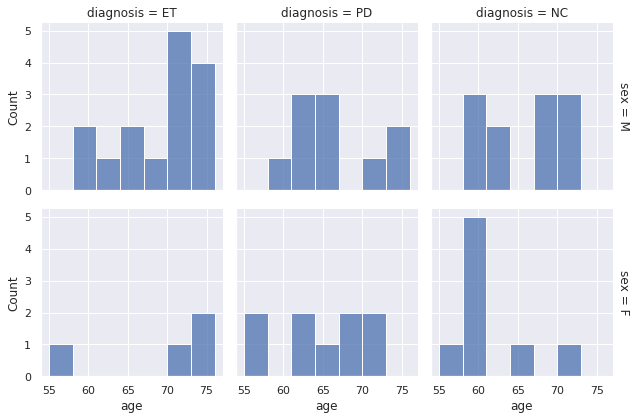

In [84]:
# plot tmp27 distribution 2*3
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(
    sub57, x="age", col="diagnosis", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

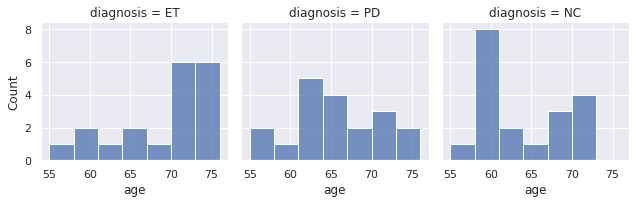

In [85]:
# plot tmp27 distribution 1*3
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(
    sub57, x="age", col="diagnosis",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

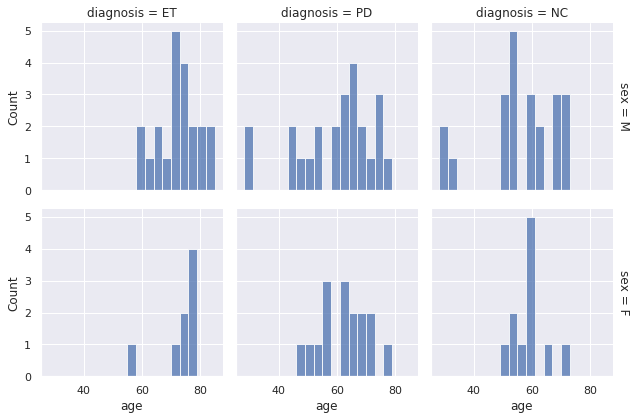

In [90]:
# plot all subject distribution 2*3
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
ax1=sns.displot(res, x="age", col="diagnosis", row="sex",
                binwidth=3, height=3, facet_kws=dict(margin_titles=True))

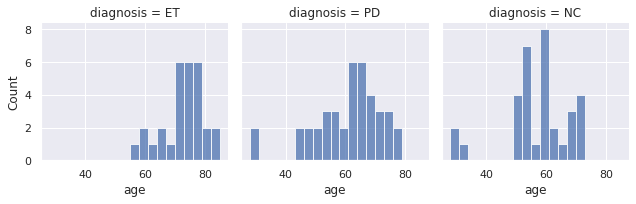

In [91]:
# plot all subject distribution 1*3
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(res, x="age", col="diagnosis",
            binwidth=3, height=3, facet_kws=dict(margin_titles=True))